In [1]:
#libraries for simple graph

import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import PIL
import requests
import seaborn as sns
import pandas as pd
import os

In [ ]:
os.getcwd() 

In [124]:
data = pd.read_csv('wages_vs_age.csv')

#i only want data from the last few years
#i don't want the summary data (e.g., the "all employees" data)
#a lot of columns have leading spaces ):
#the age column appears to re-sample from pre-established groups (e.g., the 25 year olds are in there 3+ times, under the
#25+ column, the 25-64, 25-54, etc.) because of this i'm only going to look at the 25-54 year olds (the age group most likely to have a job)
#i only wanted to look at ontario residents (so removing pre-landed)


data_filtered = data[(data['IMMIGRANT'] != "Total") & 
                     (data['IMMIGRANT'] != " Non-landed immigrants") &
                      (data["TYPE OF WORK"] == "All employees") & 
                      (data['IMMIGRANT'] != " Total Landed Immigrants") &
                      (data['EDUCATION'] != "Total, all education levels") & 
                      (data['GEOGRAPHY'] != "Canada") &
                      (data['YEAR'] > 2014) & 
                      (data["Both sexes"] != 0) &
                      (data['AGE GROUP']=="25 - 54")] 


#data_filtered

#it's not really explained in the documentation accompanying the data but the actual wage is stored under the sex category,
#the only informative "hourly wage" information is in the Both sexes column for some reason??

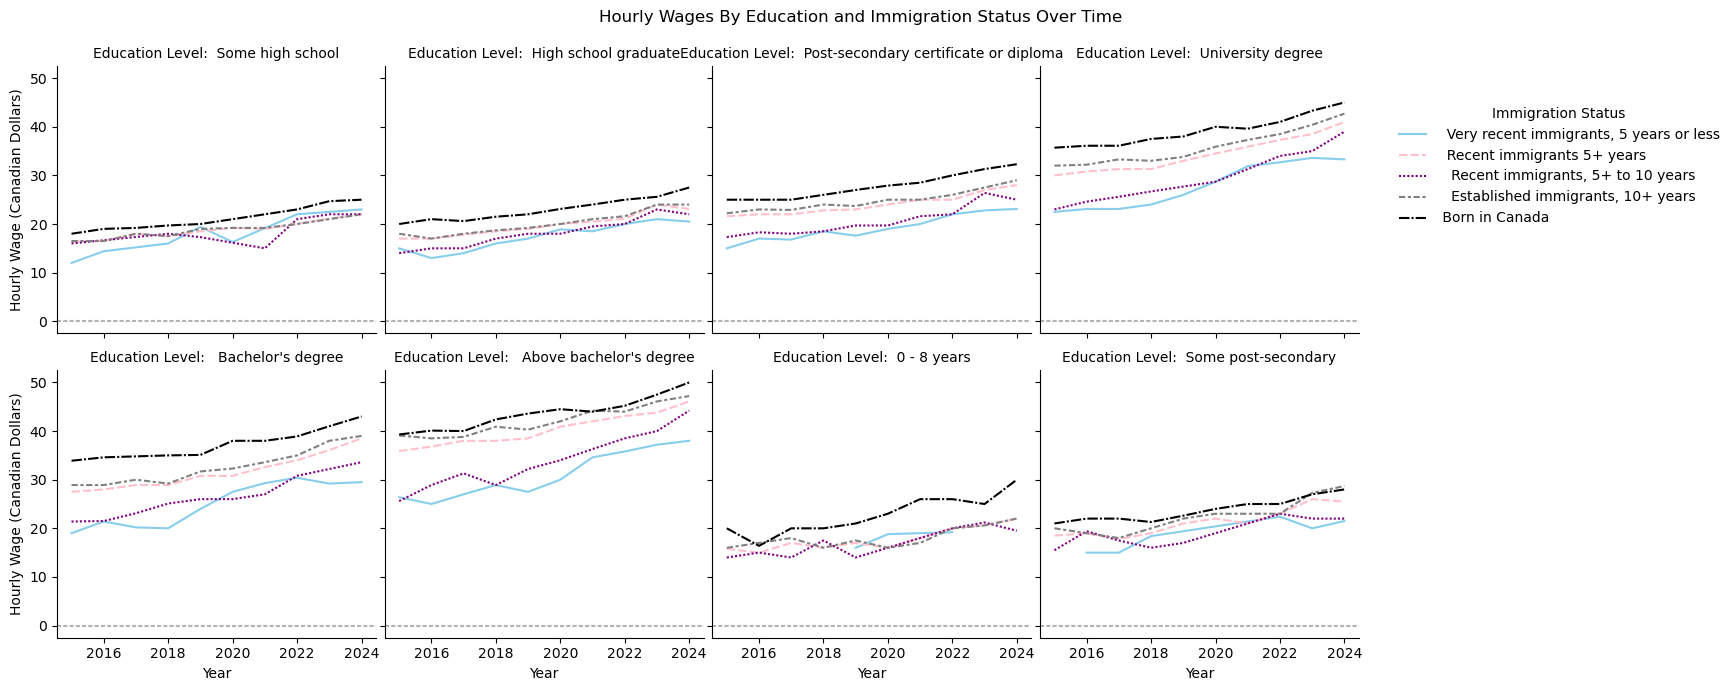

In [145]:


wages_over_year = sns.relplot(data = data_filtered, x = 'YEAR', y = 'Both sexes', 
                              style = 'IMMIGRANT', hue = "IMMIGRANT", col = 'EDUCATION', 
                              kind = 'line', col_wrap = 4,
                              height = 3.5, aspect = 1,
                              palette = ["skyblue", "pink", "purple", "grey", "black"])

(wages_over_year.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Year", "Hourly Wage (Canadian Dollars)")
  .set_titles("Education Level: {col_name}")
  .tight_layout(w_pad=0))


wages_over_year._legend.set_title("Immigration Status")
wages_over_year._legend.set_bbox_to_anchor([1,.75])

#add overall title
wages_over_year.fig.suptitle('Hourly Wages By Education and Immigration Status Over Time')

#move overall title up
wages_over_year.fig.subplots_adjust(top=.9)